# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Loading the dataset

In [2]:
rcell = pd.read_csv("used_device_data.csv")
rcell.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

Shape of the data


In [3]:
rcell.shape

(3454, 15)

In [4]:
rcell.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [5]:
rcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Coverting "objects" to "category" reduces the data space required to store the dataframeLets convert the 'objects' type to 

In [6]:
rcell.brand_name = rcell.brand_name.astype('category') ## Converting brand name from object to category
rcell.os = rcell.os.astype('category')   # Converting operating systems from object to category
rcell['4g']= rcell['4g'].astype('category')  #Converting fourth-generation(4g) from object to category
rcell['5g']=rcell['5g'].astype('category')   #Converting fifth-generation(5g) from object to category
rcell.info()       # using info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

In [7]:
rcell.duplicated().sum()   #checking for duplicated values

0

In [8]:
rcell.isnull().sum()  #generating the null values

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Looks like there are null values in our dataset.

Copying the data so we don't change the original dataset

In [9]:
rcell1 = rcell.copy()

Checking the median values so that the NaN (Not a Number) values can be sucessfully replaced.

Null values are sucessfully replaced by the medians of the columns.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Before beginning, I have done the uni-variate and bi-variate analysis in a overall manner. Which means that I haven't followed a set pattern other than answering this 7 questions. After that I have added some univariate analysis too at the very end.

In [10]:
rcell1.head(8)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726


In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Used price 

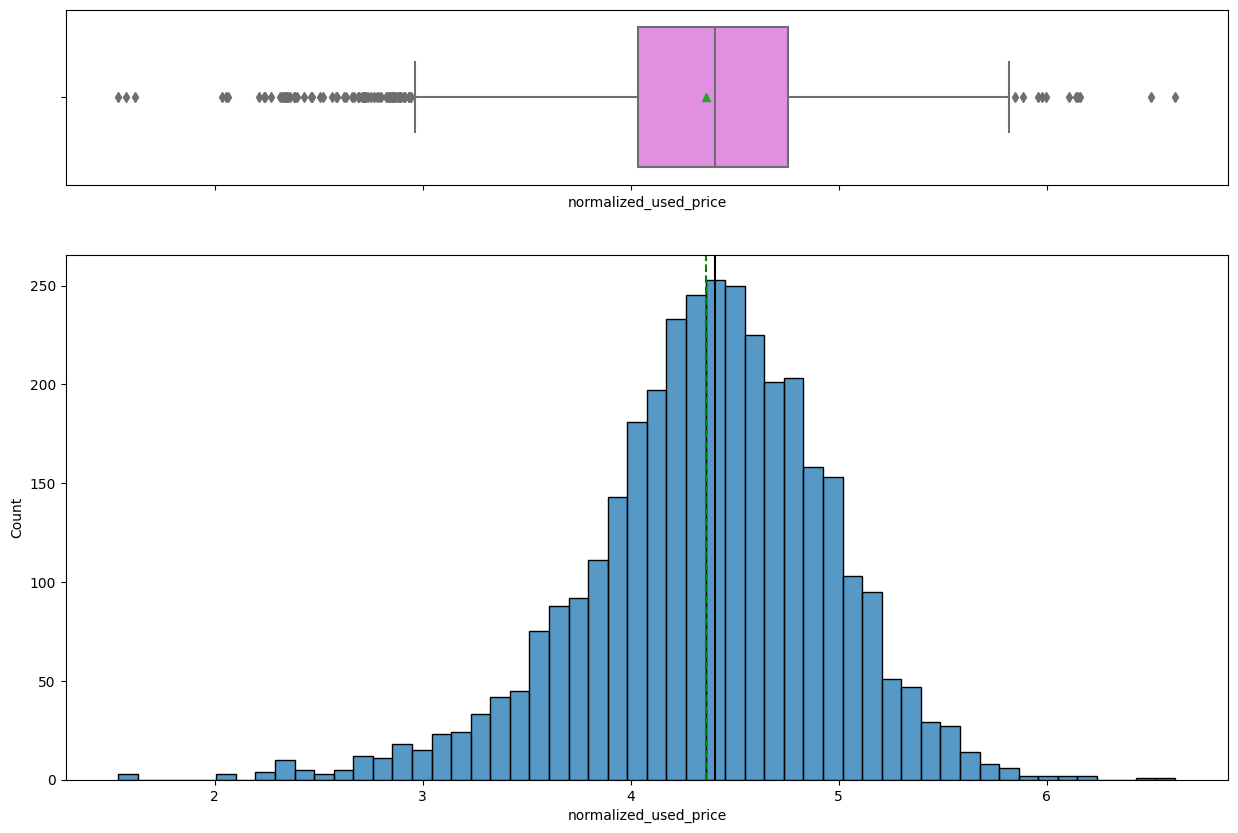

In [12]:
# Write the code here
#Observation of the 
histogram_boxplot(rcell1,'normalized_used_price')


The normalized used price seems to be in between 4-5 Euros.

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Brands and their popularities

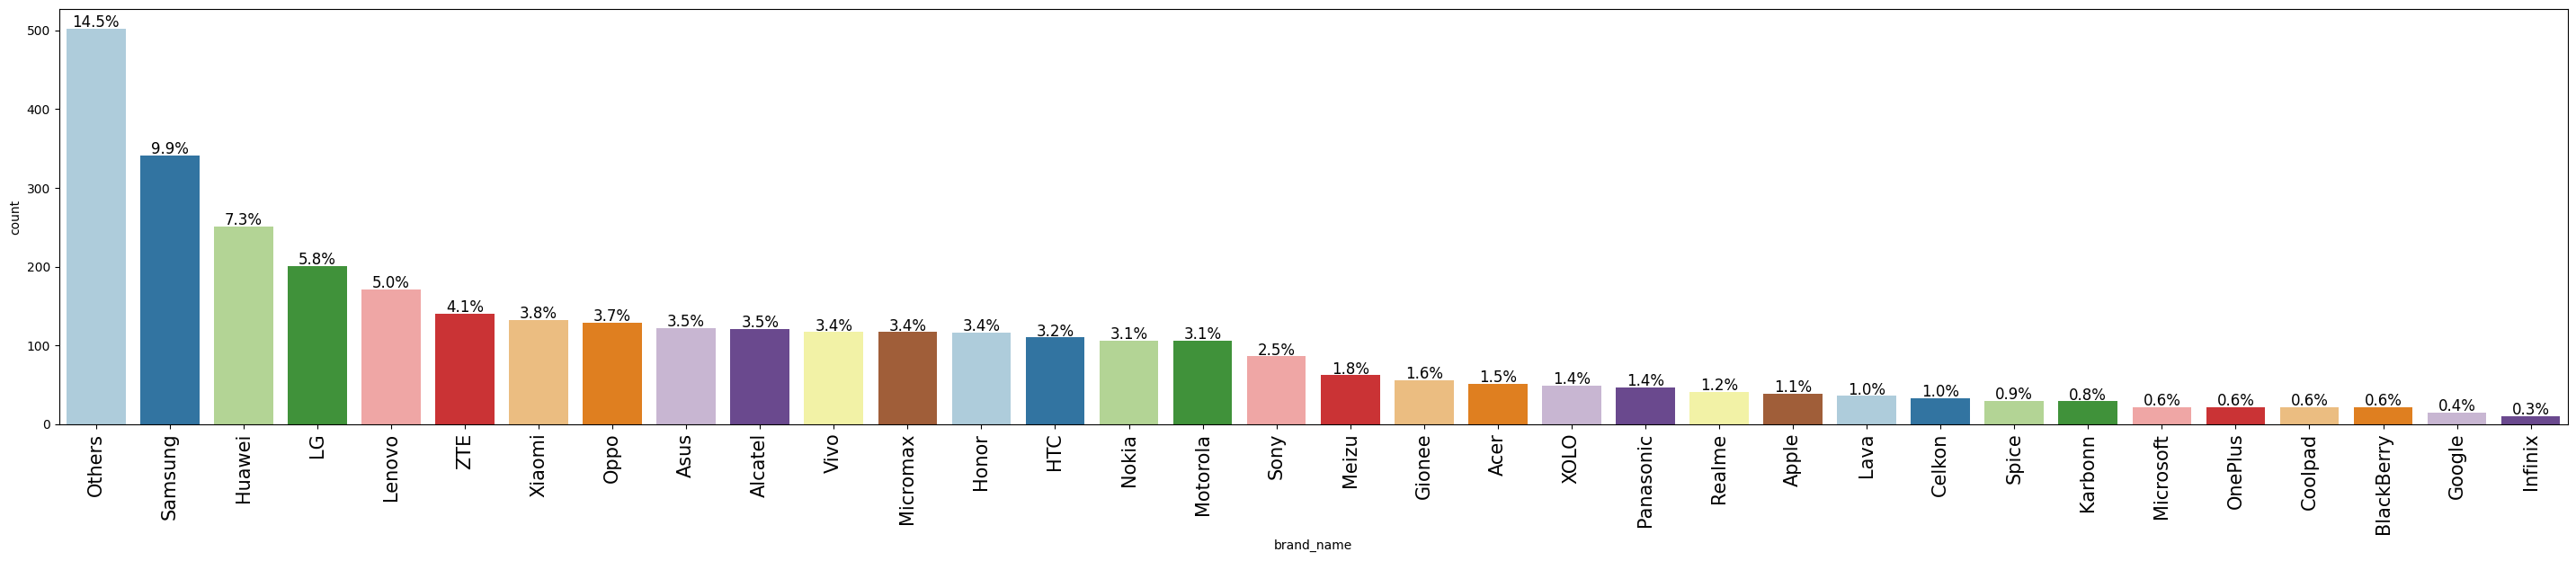

In [14]:
labeled_barplot(rcell1, 'brand_name', perc = True)

We see that the most popular listed brand is 'Samsung' mobiles which ranges to 9.9% and the other non-listed brands tops the list of having popularity of 14.5%

Popularity of the operating system

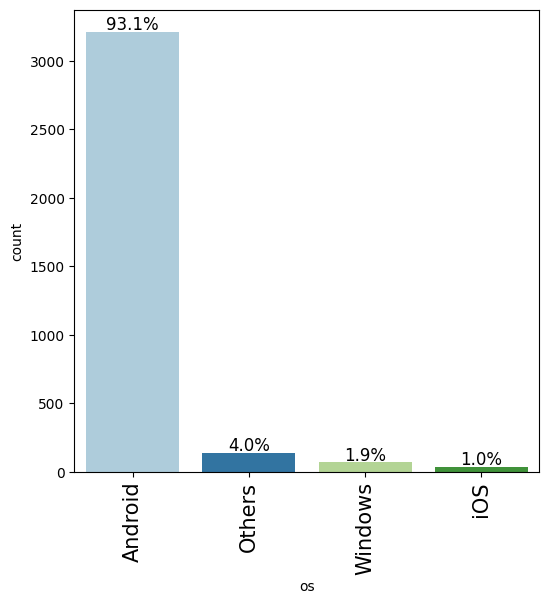

In [15]:
labeled_barplot(rcell1, 'os', perc = True)

We see that among all the most popular operating systems Android tops the list(93.1%).

Brand Name Vs RAM

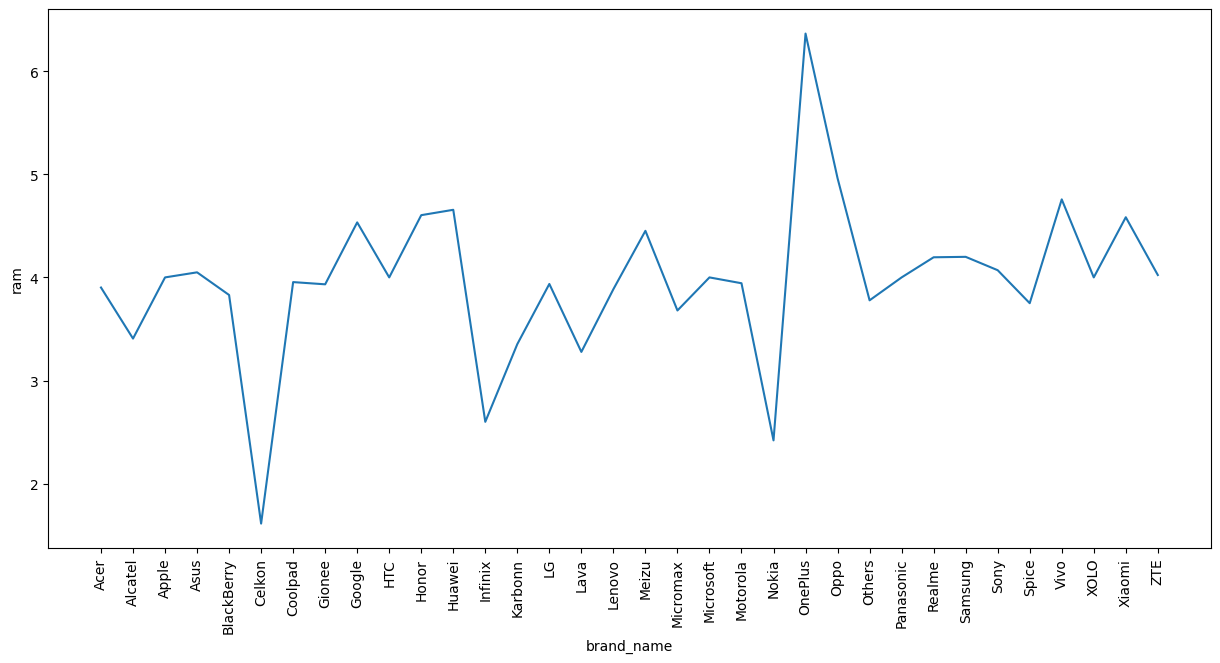

In [16]:
plt.figure(figsize=(15,7));
sns.lineplot(data=rcell1, x='brand_name', y ='ram',errorbar = None);
plt.xticks(rotation=90)
plt.show()

We can see that the most ram is used by the brand 'One Plus' which is over 6 gigabytes.

Release year

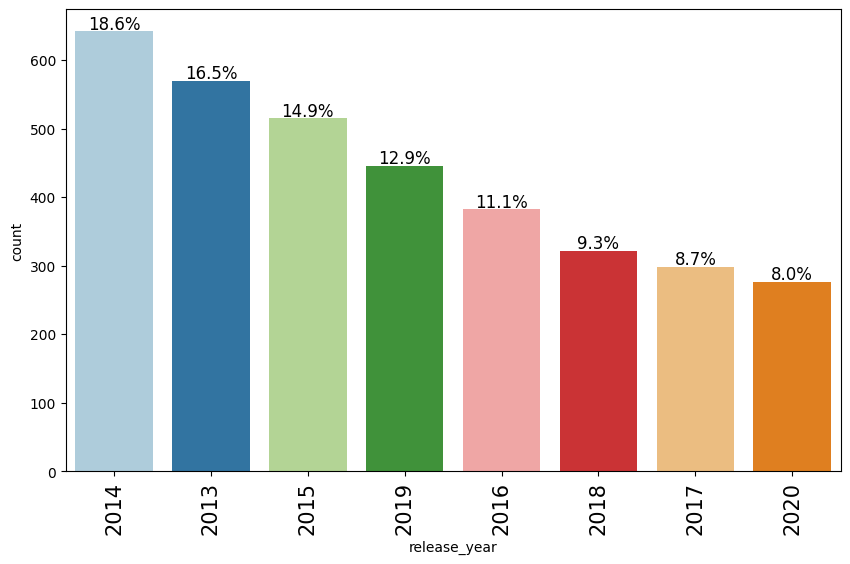

In [17]:
labeled_barplot(rcell1, 'release_year', perc = True)

We can see that the most phones sold are from the year '2014'

Battery Vs Weight

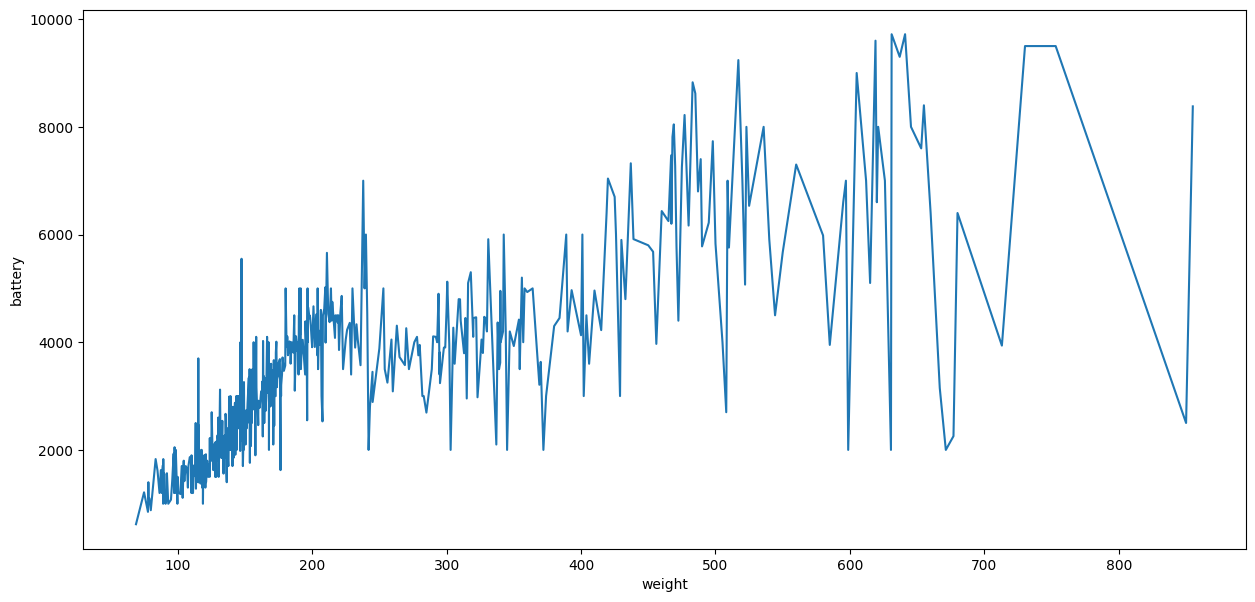

In [18]:
plt.figure(figsize=(15,7));
sns.lineplot(data=rcell1, x='weight', y ='battery',errorbar = None);
plt.show()

We can see that the data seems to go up for large batteries and also another interesting things is that there are also many phones which has a lower battery power but has comparatively higher weight

Brand Name Vs Screen Size

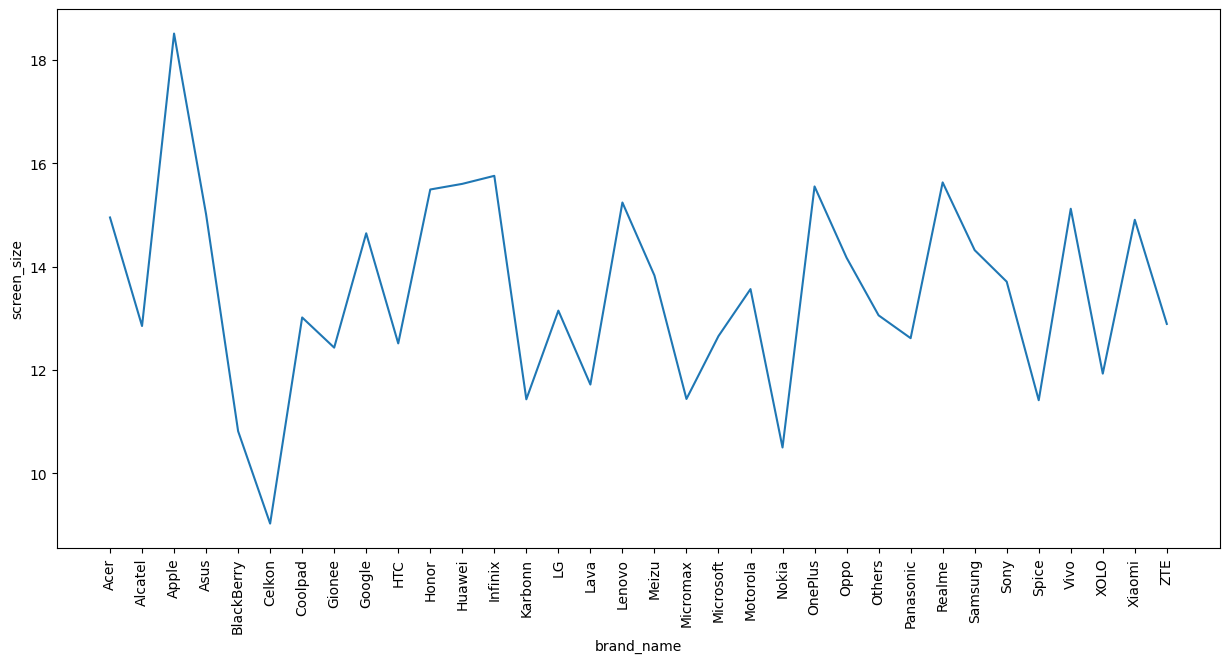

In [19]:
plt.figure(figsize=(15,7));
sns.lineplot(data=rcell1, x='brand_name', y ='screen_size',errorbar = None);
plt.xticks(rotation=90);
plt.show();

Since the sizes are in centimetres respectively. So we can see phones from 'Apple' having a display of more than 16 cm (~6.29 inches). Other than that phones from 'Celikon' has the smallest screen size.

Brand Names Vs Selfie Camera Megapixels

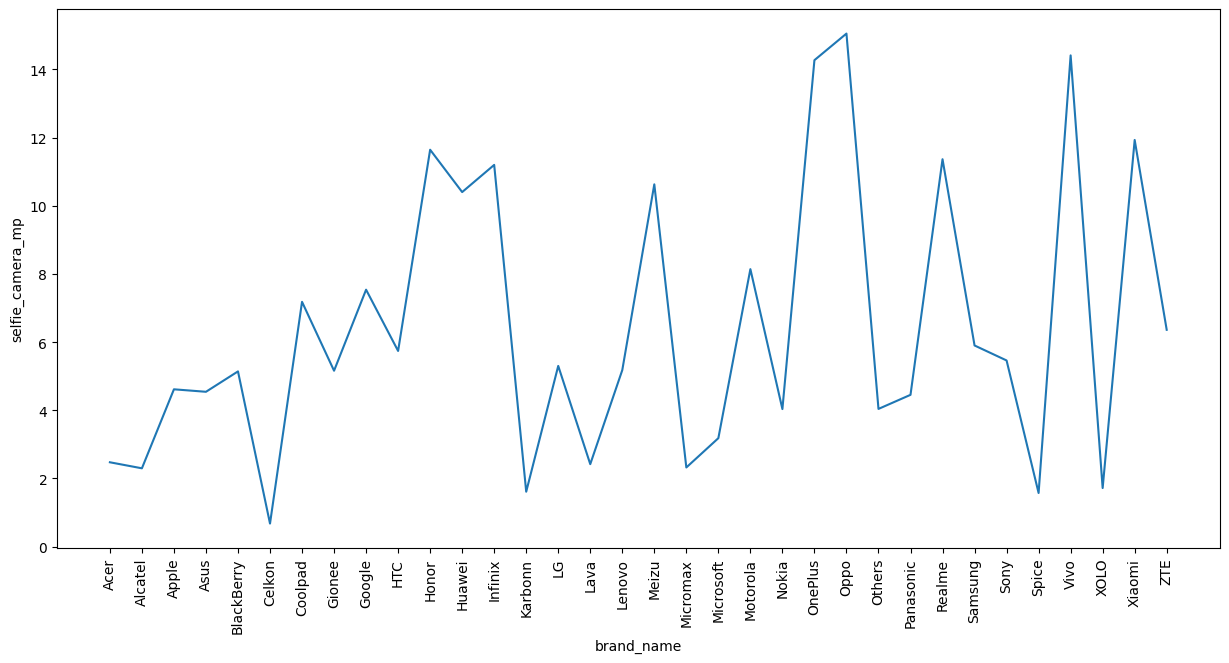

In [20]:
plt.figure(figsize=(15,7));
sns.lineplot(data=rcell1, x='brand_name', y ='selfie_camera_mp',errorbar = None);
plt.xticks(rotation=90);
plt.show();

We can see that 'Oppo' has the highest megapixels for selfie cameras.

Normalized New Price

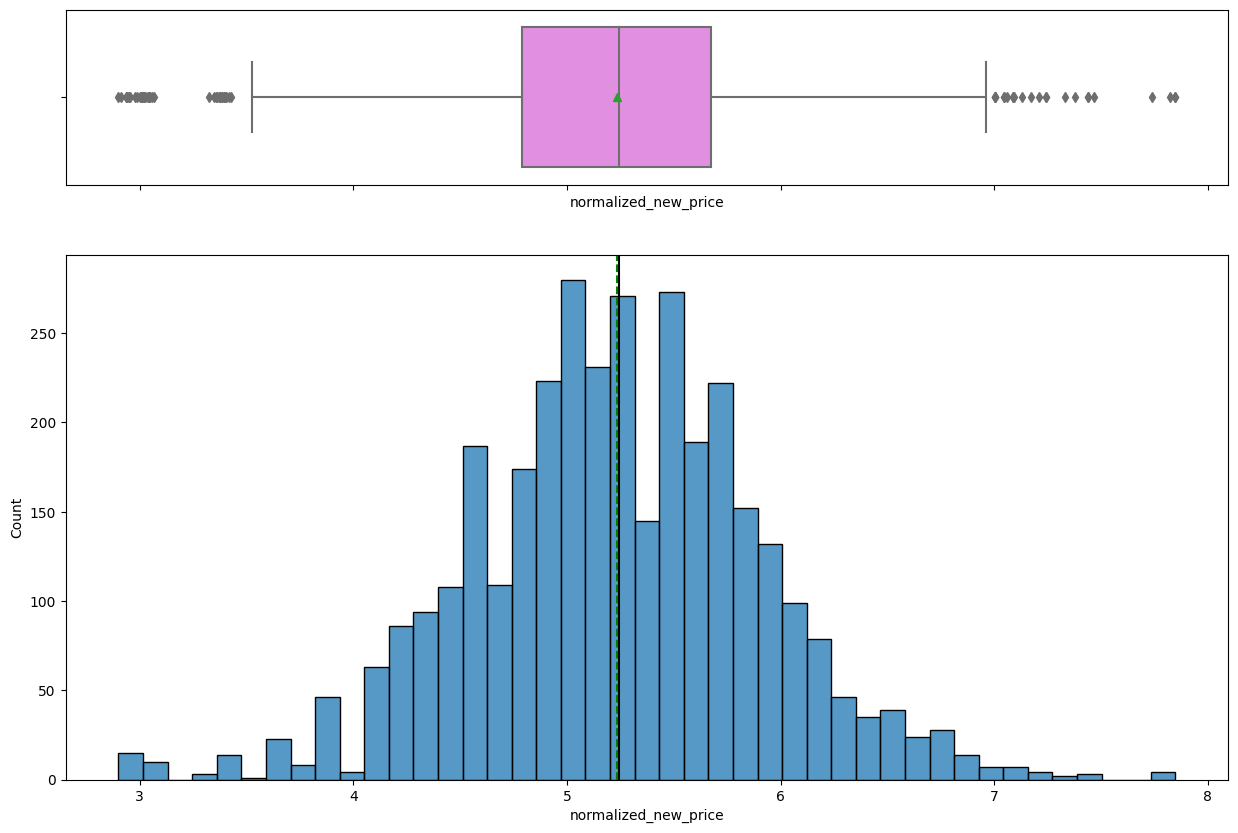

In [21]:
histogram_boxplot(rcell1,'normalized_new_price')

The median normalized new price is between (5-6) Euros.

Battery

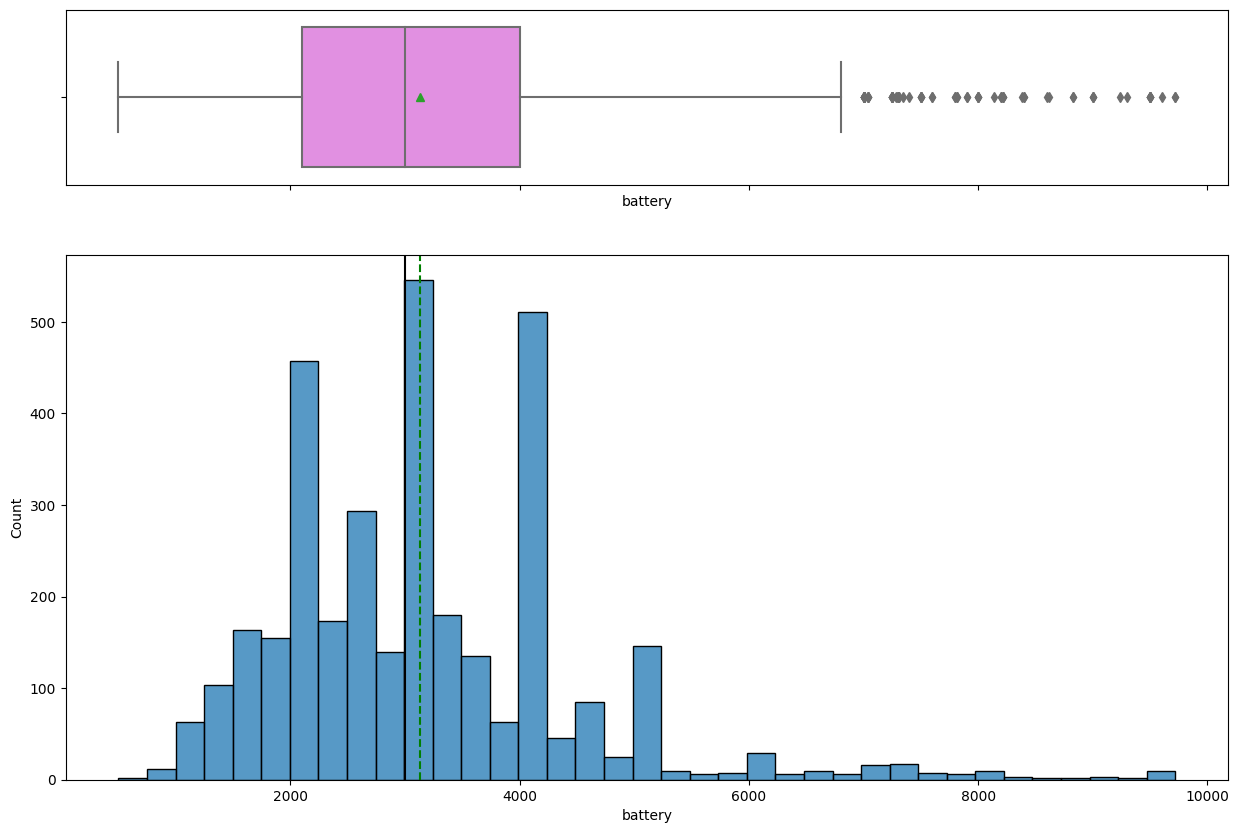

In [22]:
histogram_boxplot(rcell1,'battery') #generates a boxplot

The median battery power seems to be between (2000-4000) maH.

Weight

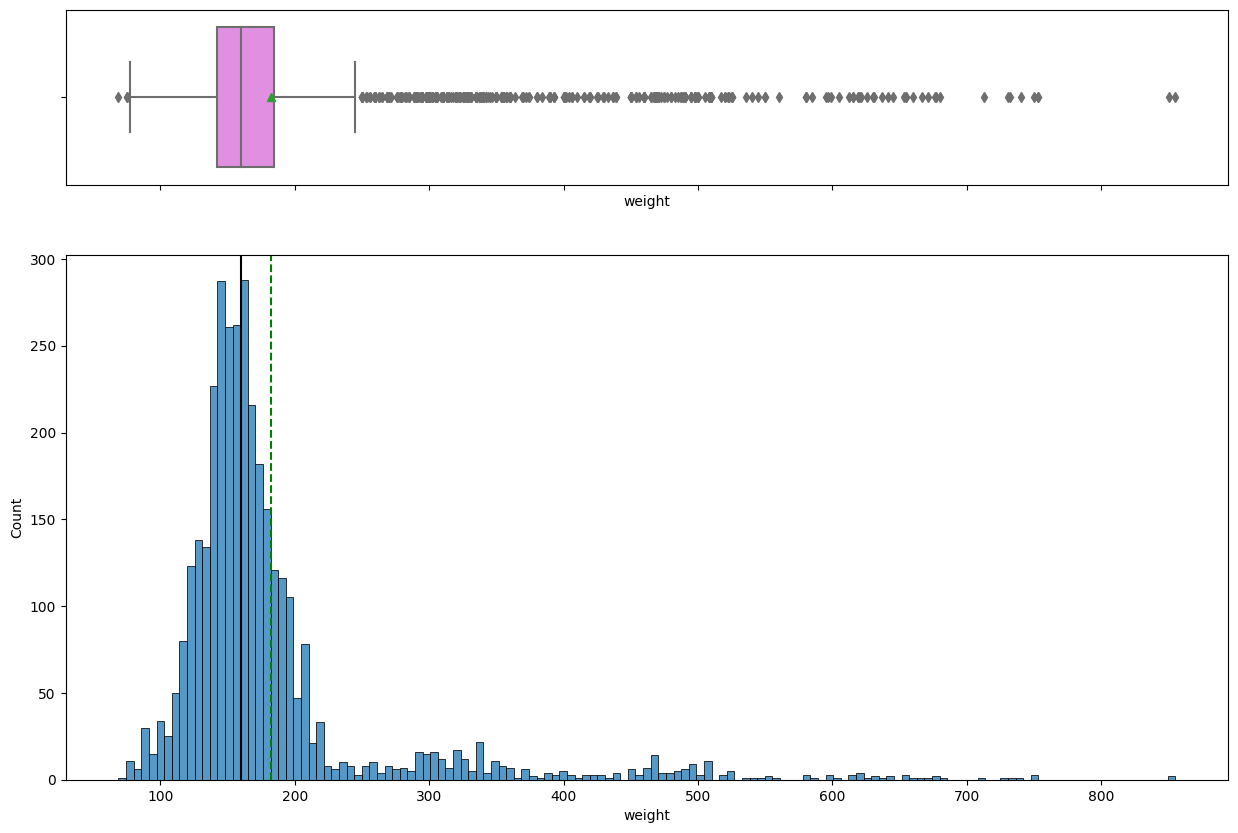

In [23]:
histogram_boxplot(rcell1,'weight') #will generate a boxplot

Most devices weigh between (150-200) grams and we can also see there are lot of whiskers and some devices may weigh upto more than 800 grams too.

Selfie Camera Mega-Pixels (Boxplot Visual)

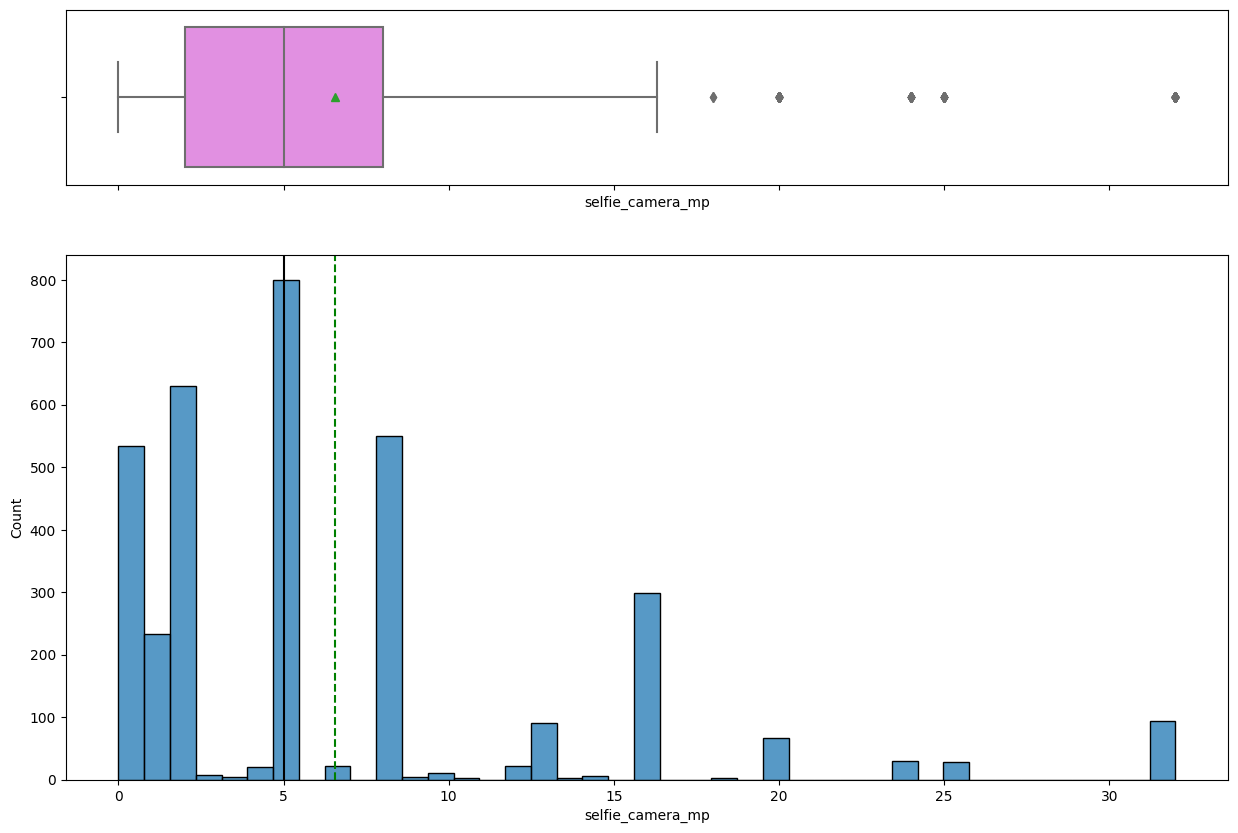

In [24]:
histogram_boxplot(rcell1,'selfie_camera_mp')

6 mega-pixels selfie camera seems to appear among most phones.

Days Used

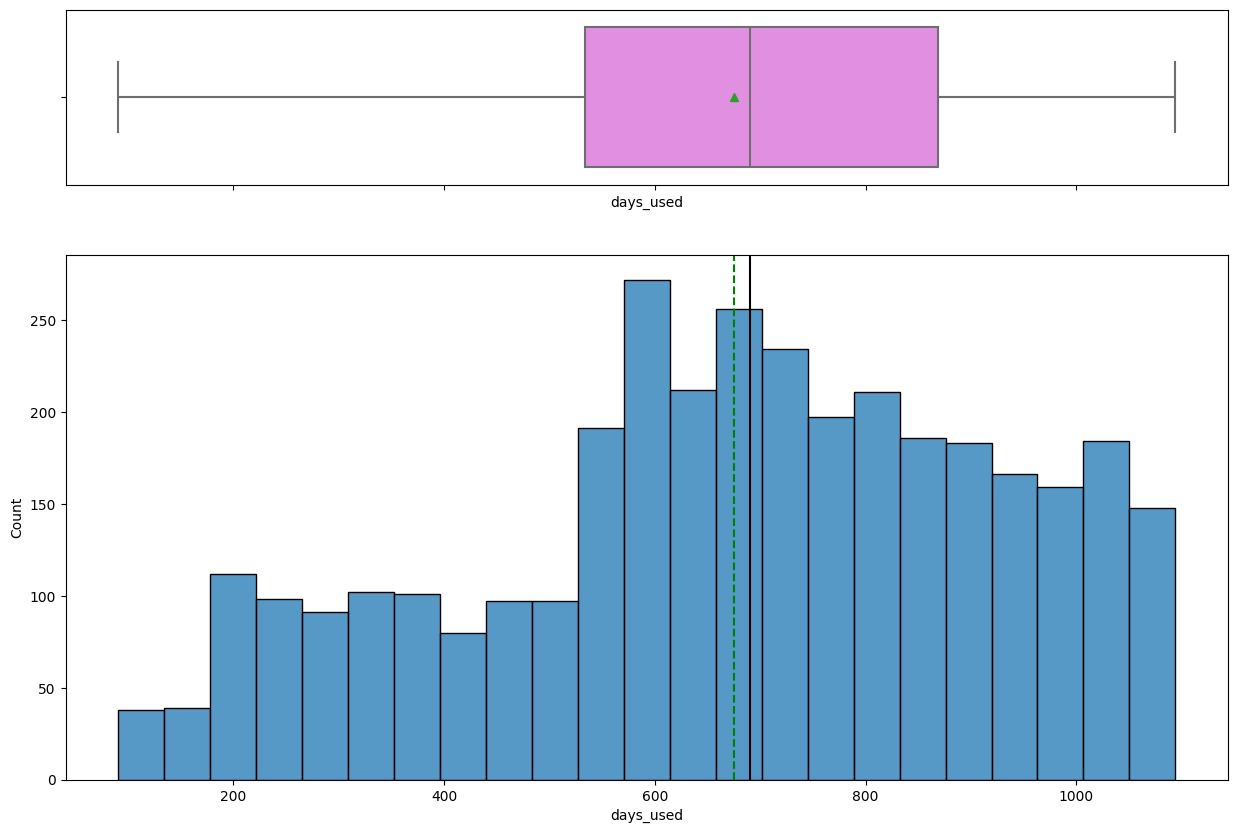

In [25]:
histogram_boxplot(rcell1,'days_used')

Most devices are have an age of (600-750) days.

Screen-Size

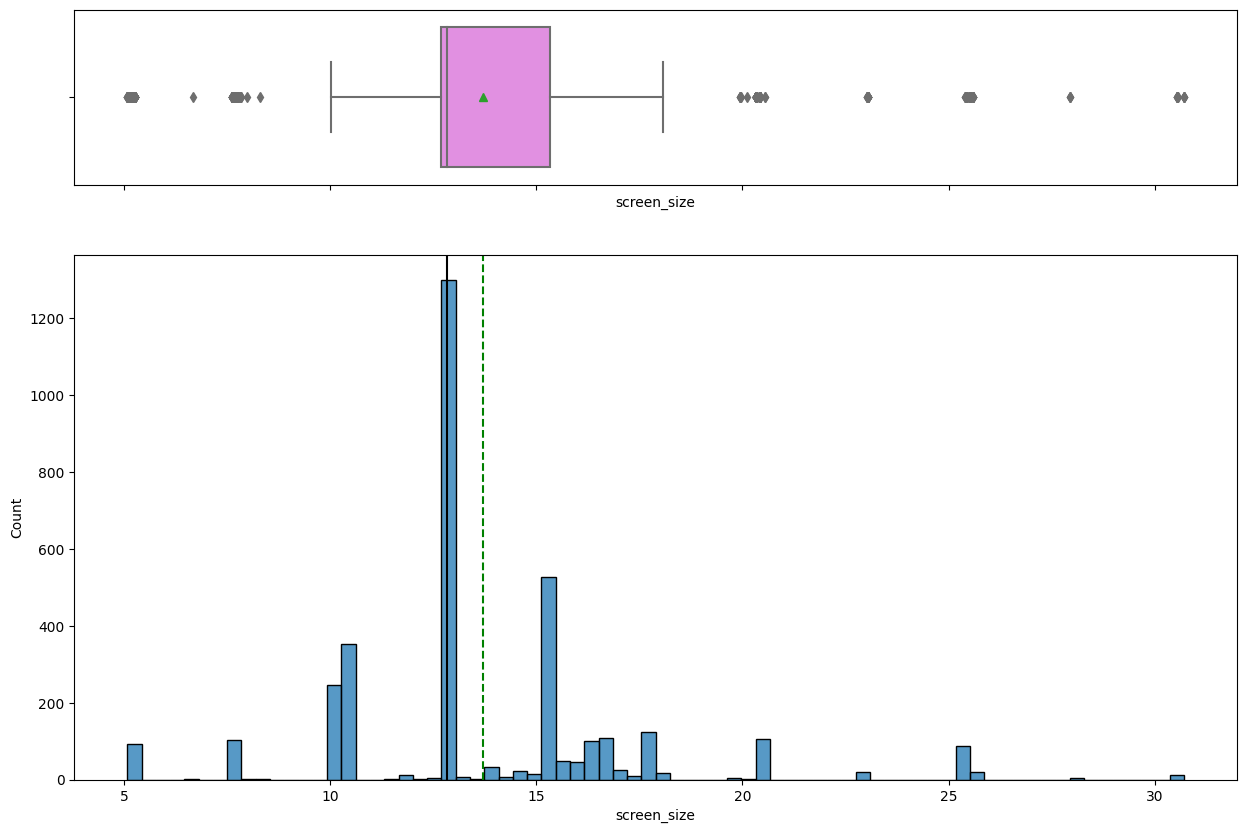

In [26]:
histogram_boxplot(rcell1,'screen_size')

It seems that the median phone screen size is between 12-15 cm ~(4.72-5.9 inches).

4 G

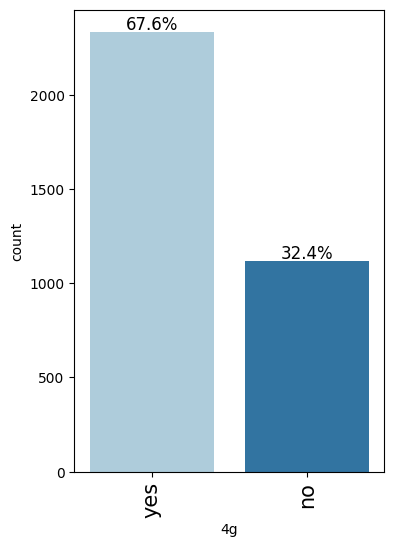

In [27]:
labeled_barplot(rcell1, '4g', perc = True)


Most phones have 4 G network accomodation.

5 G

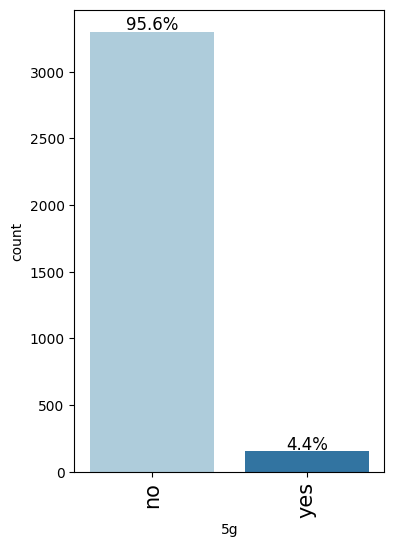

In [28]:
labeled_barplot(rcell1, '5g', perc = True)


Most phones does not have the 5 G network accomodation.

Internal Memory

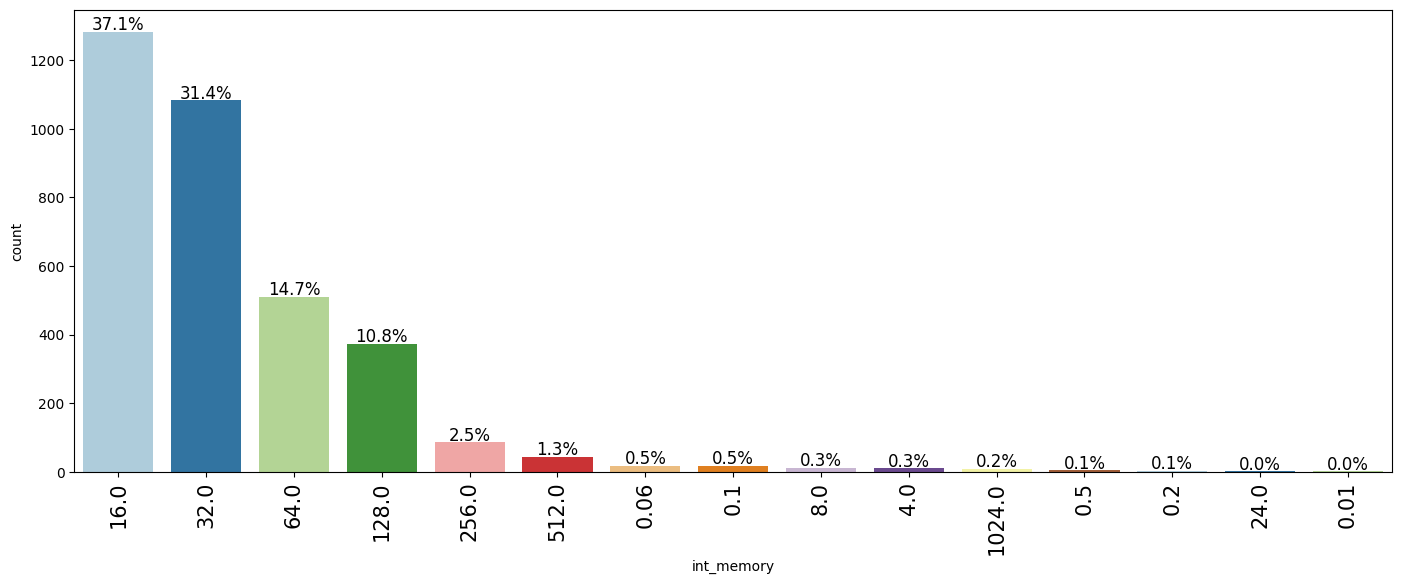

In [29]:
labeled_barplot(rcell1, 'int_memory', perc = True)


Most phones comes with an internal memory of 16.0 giga-bytes.

R A M

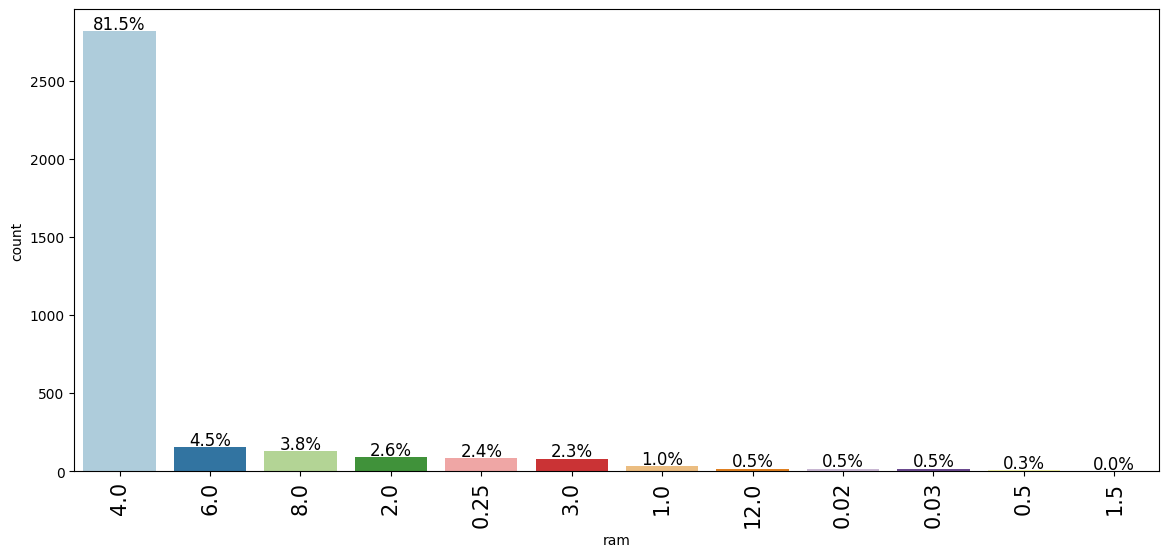

In [30]:
labeled_barplot(rcell1, 'ram', perc = True)

Most mobile phones have internal access memory of 4.0 giga-bytes.

Main-Camera Megapixels

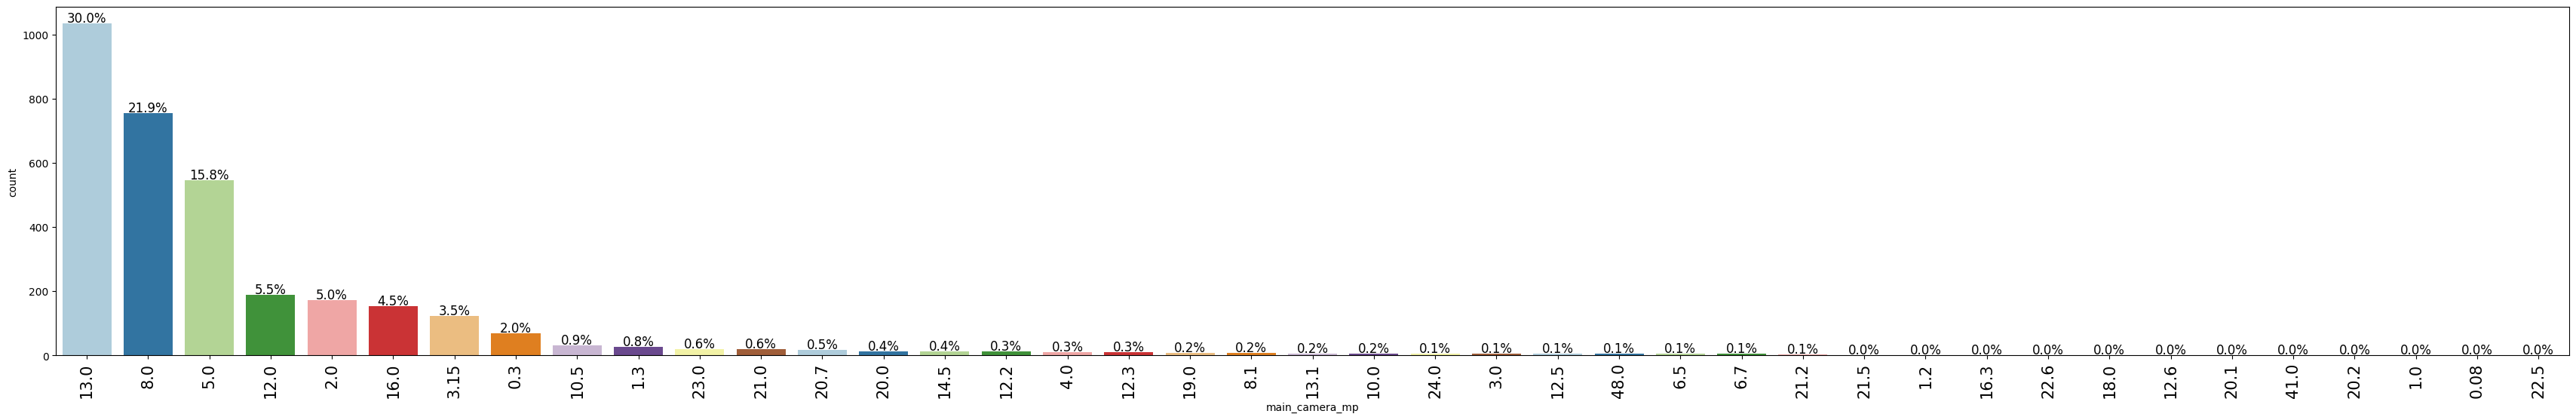

In [31]:
labeled_barplot(rcell1, 'main_camera_mp', perc = True)

Through this barplot we can see that the most devices have 13.0 megapixels for their back or main camera.

Selfie Camera Mexapixels(Barplot Visual)

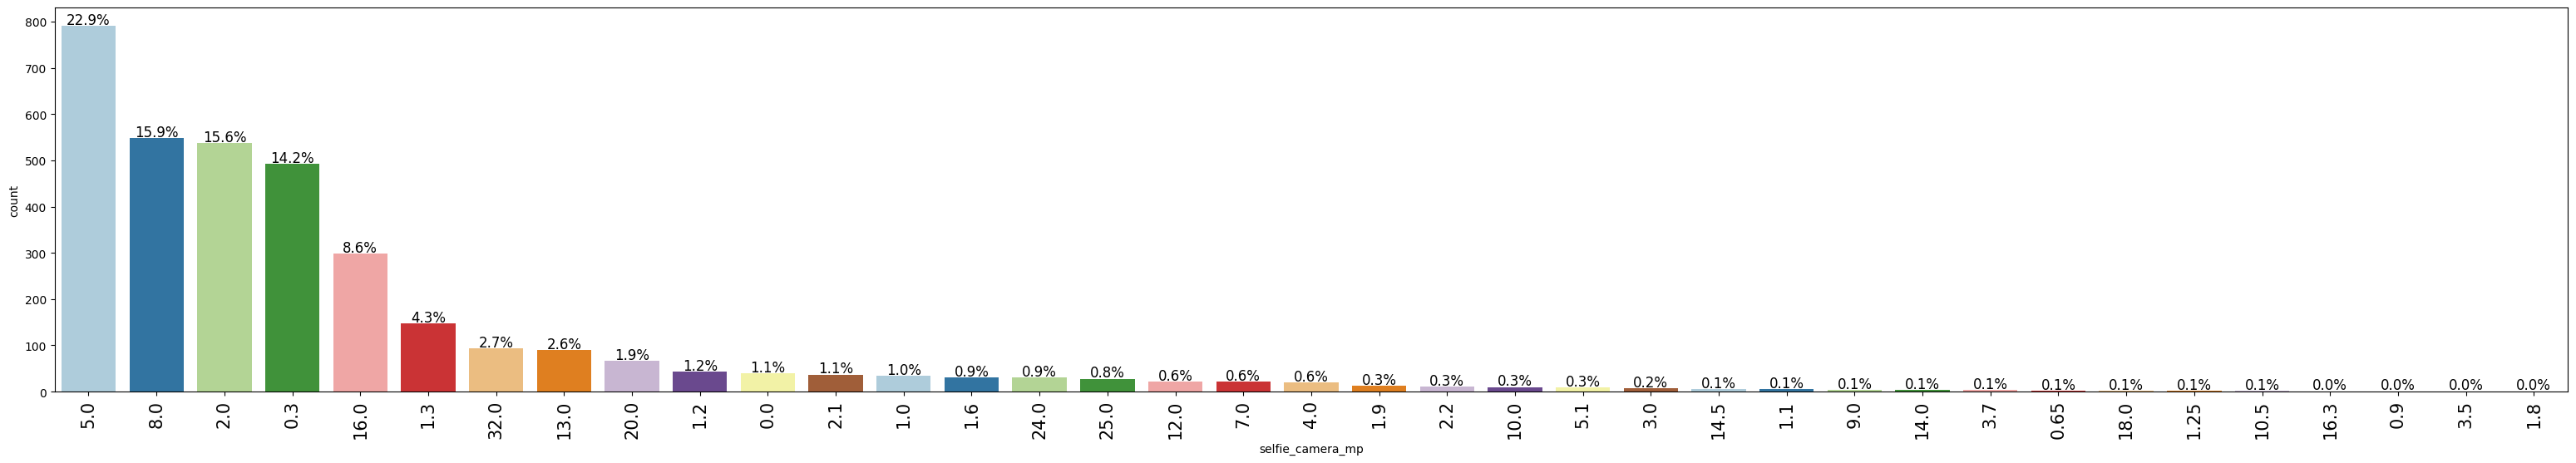

In [32]:
labeled_barplot(rcell1, 'selfie_camera_mp', perc = True)

Through this barplot we can see that the most devices have 5.0 megapixels for their front or selfie camera's.

Heatmap of Correlation

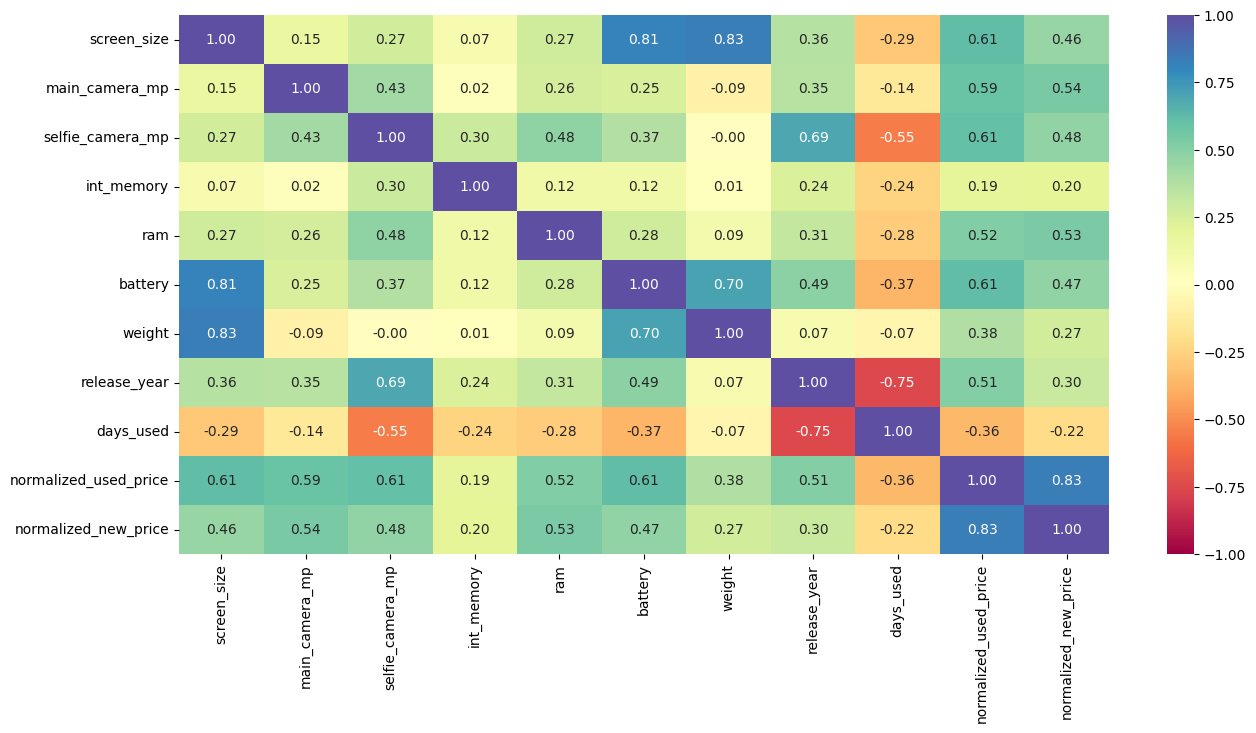

In [33]:
only_num = rcell1.select_dtypes(include=np.number).columns.tolist()

#will generate a heat map of correlation

plt.figure(figsize=(15, 7))
sns.heatmap(
    rcell1[only_num].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [34]:
rcell1.median()

/var/folders/wd/_ks2q9js4k1blpm4g9qwzzvh0000gn/T/ipykernel_5428/109670106.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rcell1.median()


screen_size                12.830000
main_camera_mp              8.000000
selfie_camera_mp            5.000000
int_memory                 32.000000
ram                         4.000000
battery                  3000.000000
weight                    160.000000
release_year             2015.500000
days_used                 690.500000
normalized_used_price       4.405133
normalized_new_price        5.245892
dtype: float64

In [35]:
rcell1['main_camera_mp'] = rcell1['main_camera_mp'].fillna(rcell1['main_camera_mp'].median())   #replacing the NaN values with medians of the columns for prediction purposes
rcell1['selfie_camera_mp'] = rcell1['selfie_camera_mp'].fillna(rcell1['selfie_camera_mp'].median())   #replacing the NaN values with medians of the columns for prediction purposes
rcell1['int_memory'] = rcell1['int_memory'].fillna(rcell1['int_memory'].median())   #replacing the NaN values with medians of the columns for prediction purposes
rcell1['ram'] = rcell1['ram'].fillna(rcell1['ram'].median())   #replacing the NaN values with medians of the columns for prediction purposes
rcell1['battery'] = rcell1['battery'].fillna(rcell1['battery'].median())   #replacing the NaN values with medians of the columns for prediction purposes
rcell1['weight'] = rcell1['weight'].fillna(rcell1['weight'].median())   #replacing the NaN values with medians of the columns for prediction purposes

In [36]:
rcell1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

We have replaced all the NaN values with their medians successfully.

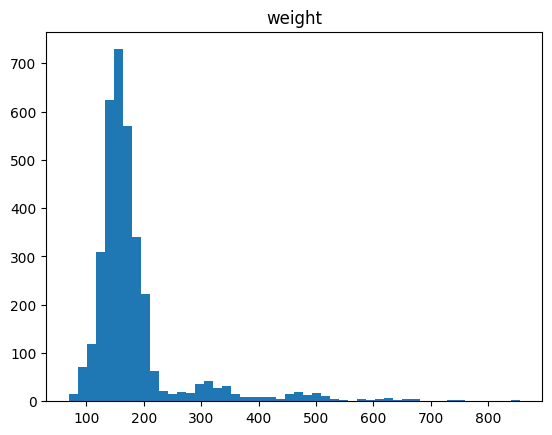

In [37]:
cols_to_log = ["weight"]

for colname in cols_to_log:
    plt.hist(rcell1[colname], bins=50)
    plt.title(colname)
    plt.show()

In [38]:
for colname in cols_to_log:
    rcell1[colname + "_log"] = np.log(rcell1[colname])

rcell1.drop(cols_to_log, axis=1, inplace=True)  # drop previous price columns

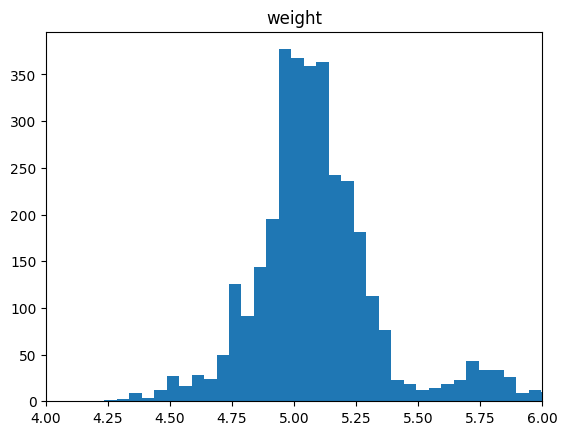

In [39]:
for colname in cols_to_log:
    plt.hist(rcell1[colname + "_log"], bins=50)
    plt.xlim(4.0,6.0)
    plt.title(colname)
    plt.show()

We have normalized the weight values and we can see it through this visualization.

Dummy Variables

The pandas [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function is used to convert a categorical variable to indicator/dummy variables (columns).

- It returns the dummy-coded data as a pandas dataframe
- In general, the `get_dummies()` function is applied to categorical columns in a pandas dataframe to generate dummy (one-hot encoded) columns

In [40]:
rcell1 = pd.get_dummies(rcell1, columns=["brand_name", "os", "4g", "5g"], drop_first=True)
rcell1.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,2020,127,4.307572,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,2020,325,5.162097,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,2020,162,5.111084,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,2020,345,5.135387,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,2020,293,4.389995,4.947837,...,0,0,0,0,0,0,0,0,1,0


We can now have a more precise observation over our categorical columns through the dummmy variables.

## EDA

- It is a good idea to explore the data once again after manipulating it.

Normalized Used Price

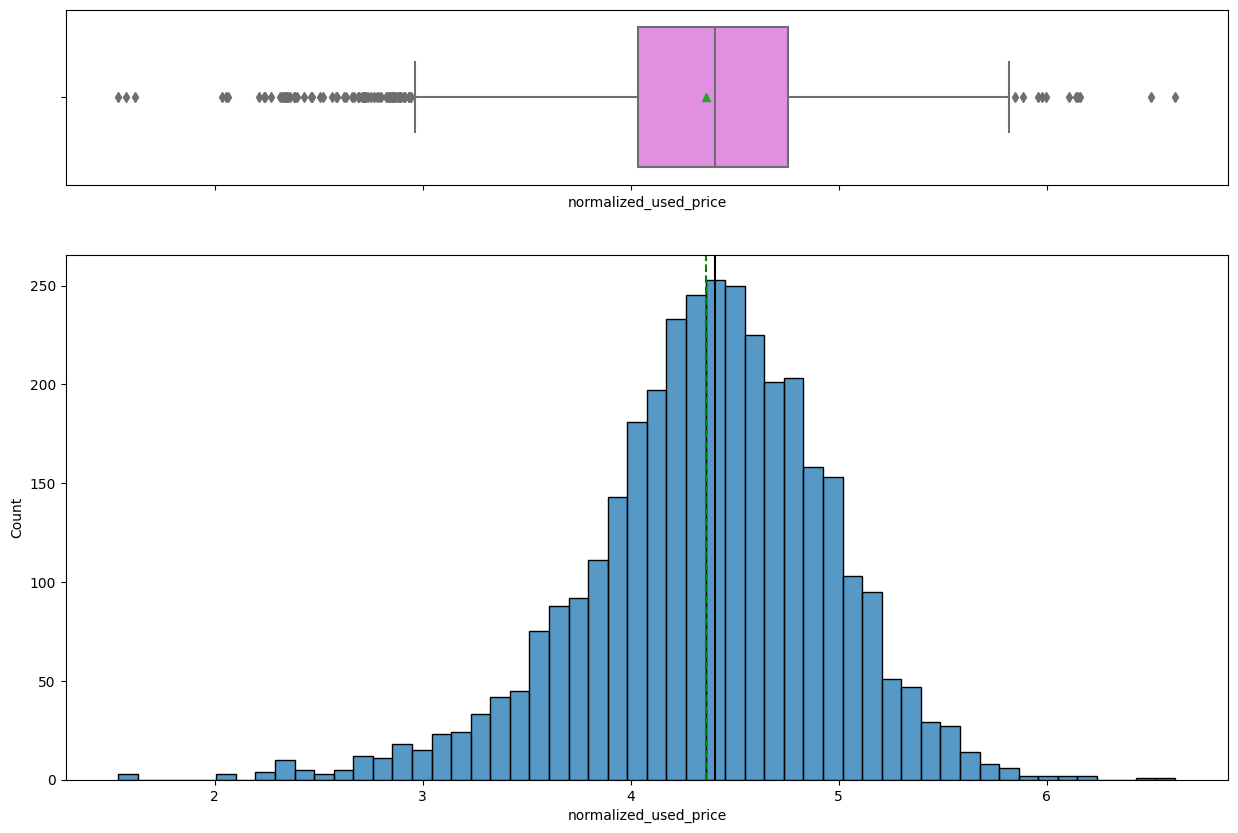

In [41]:
histogram_boxplot(rcell1,'normalized_used_price')

Normalized New Price

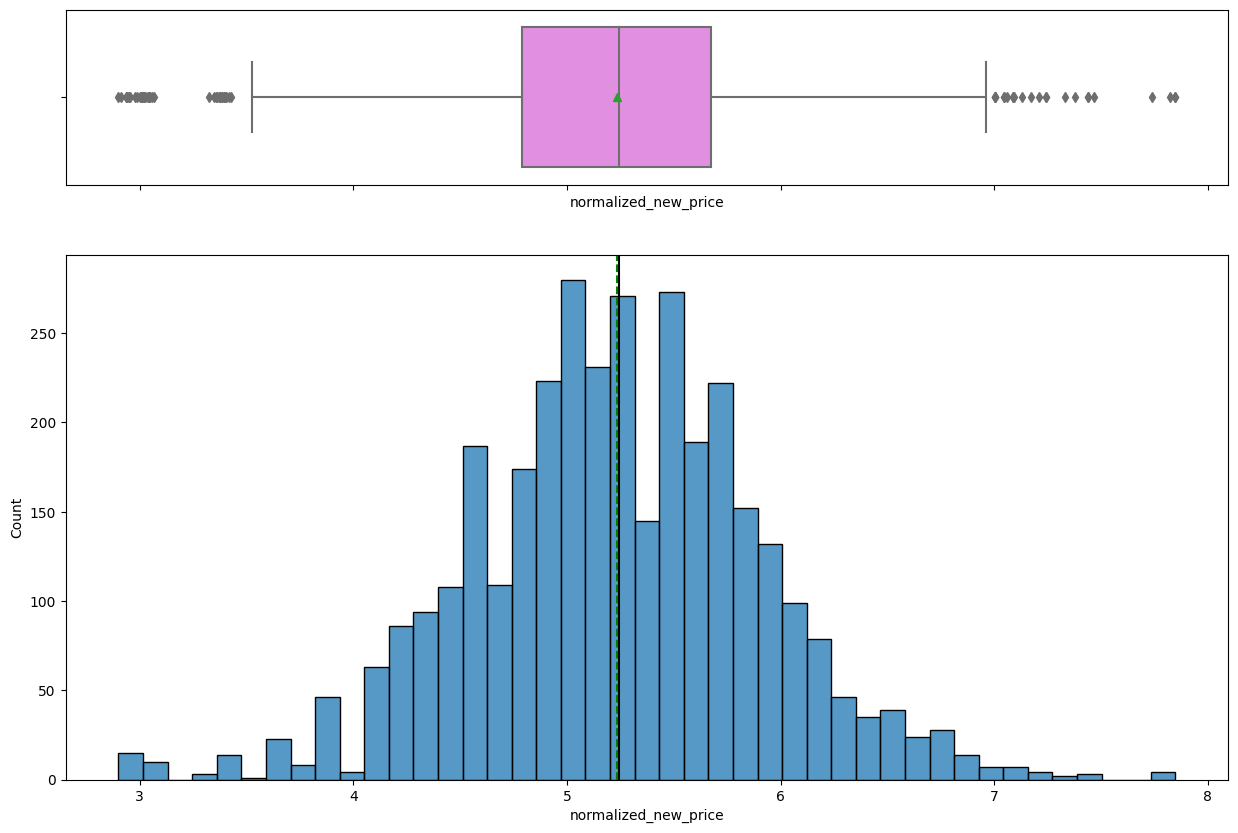

In [42]:
histogram_boxplot(rcell1,'normalized_new_price')

Weight Log

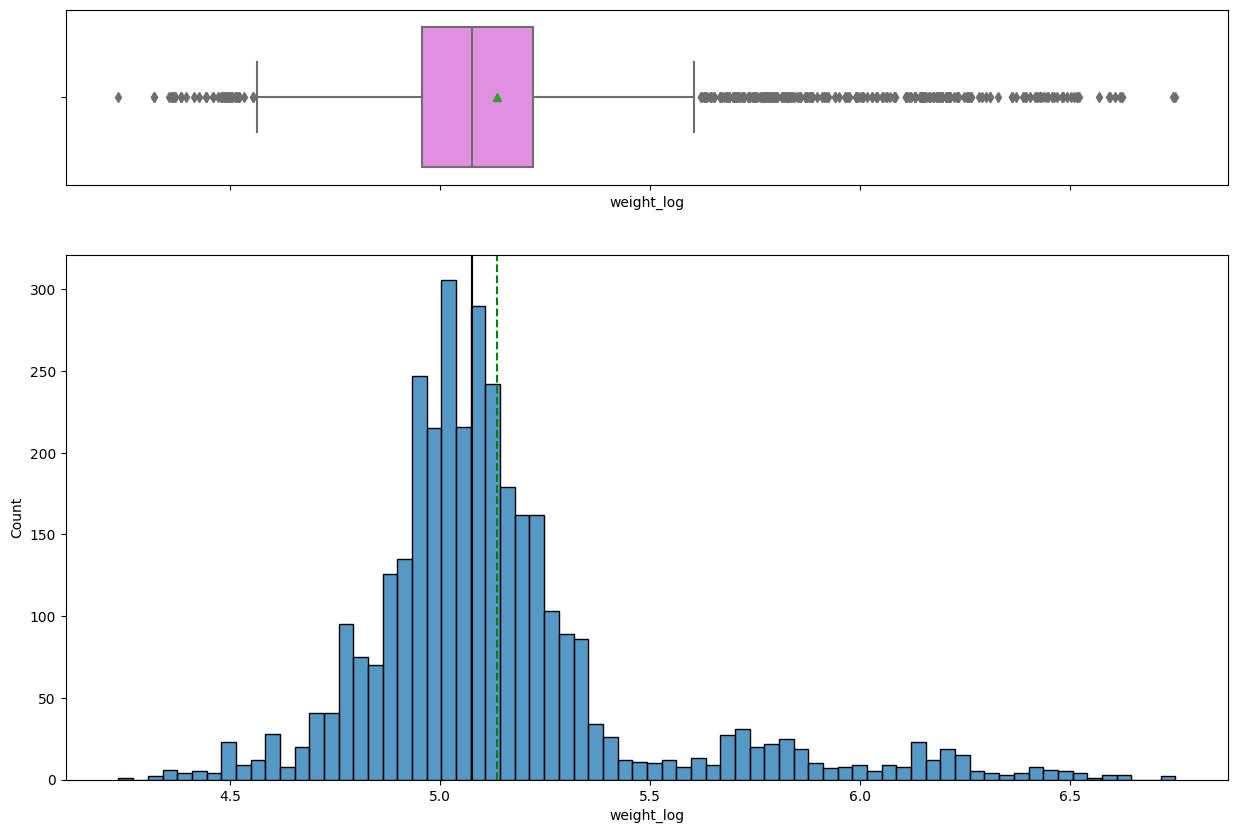

In [43]:
histogram_boxplot(rcell1,'weight_log')

Just re-checked the data's and it looks like a normal distribution

## Model Building - Linear Regression

In [44]:
#training data and testing data
X = rcell1.drop(['normalized_used_price'],axis = 1)
Y = rcell1['normalized_used_price']

In [45]:
# let's add the intercept to data
X = sm.add_constant(X)

**We will now split X and y into train and test sets in a 70:30 ratio. We will use the `train_test_split()` function of sklearn to do the same.**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [47]:
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  release_year  days_used  normalized_new_price  ...  \
3026   1800.0          2014        819              4.796204  ...   
1525   4050.0          2016        585              5.434595  ...   
1128   2550.0          2015        727              5.137914  ...   
3003   3200.0          2015        800              5.189228  ...   
2907   2900.0          2017        560              5.016220  ...   

      brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
3026                 0         

In [48]:
print(X_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  release_year  days_used  normalized_new_price  ...  \
866    3000.0          2014        632              5.190788  ...   
957    1400.0          2013        637              3.884652  ...   
280    5000.0          2020        329              4.487287  ...   
2150   3200.0          2017        648              5.639422  ...   
93     3500.0          2019        216              5.300415  ...   

      brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
866                  0   

In [49]:
print(Y.head())

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64


In [50]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     273.7
Date:                   Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                           00:36:29   Log-Likelihood:                 142.70
No. Observations:                   2417   AIC:                            -187.4
Df Residuals:                       2368   BIC:                             96.33
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [51]:
# function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [52]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228099,0.177925,0.847286,0.844124,4.268194


In [53]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236695,0.18273,0.844669,0.836958,4.447352


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Testing for multi-collinearity

In [54]:
# we have to add the constant manually
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)
olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     273.7
Date:                   Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                           00:36:29   Log-Likelihood:                 142.70
No. Observations:                   2417   AIC:                            -187.4
Df Residuals:                       2368   BIC:                             96.33
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif

In [56]:
checking_vif(X_train1)

,feature,VIF
0,const,3698822.51
1,screen_size,7.10
2,main_camera_mp,2.12
3,selfie_camera_mp,2.80
4,int_memory,1.36
5,ram,2.26
6,battery,4.04
7,release_year,4.76
8,days_used,2.66
9,normalized_new_price,3.14


We see that screen size, weight log, brand name apple and some other variables have high multi-colinearity which might affect our r^2 square if we don't fix it.

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [57]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [58]:
col_list = ["screen_size", "weight_log", "brand_name_Apple", "brand_name_Huawei","brand_name_Others","os_iOS"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.844254,0.230399
1,brand_name_Apple,0.844251,0.230402
2,brand_name_Others,0.844249,0.230403
3,os_iOS,0.844224,0.230422
4,screen_size,0.841560,0.232383
5,weight_log,0.838179,0.234849


In [59]:
col_to_drop = "brand_name_Huawei"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3698448.19
1,screen_size,7.10
2,main_camera_mp,2.12
3,selfie_camera_mp,2.80
4,int_memory,1.36
5,ram,2.26
6,battery,4.04
7,release_year,4.76
8,days_used,2.66
9,normalized_new_price,3.14


In [60]:
col_list = [
    "brand_name_Apple",
    "os_iOS", 
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.844312,0.230356
1,os_iOS,0.844287,0.230375


In [61]:
col_to_drop = "brand_name_Apple"    #dropping brand name apple as it brings least amount of change to our r^2 square
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,3693001.80
1,screen_size,7.03
2,main_camera_mp,2.12
3,selfie_camera_mp,2.77
4,int_memory,1.36
5,ram,2.25
6,battery,4.04
7,release_year,4.75
8,days_used,2.66
9,normalized_new_price,3.12


Model Performance

In [62]:
# Using ols mdel to view the data

olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     285.8
Date:                   Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                           00:36:30   Log-Likelihood:                 142.62
No. Observations:                   2417   AIC:                            -191.2
Df Residuals:                       2370   BIC:                             80.90
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [63]:
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'release_year', 'normalized_new_price', 'weight_log', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', '4g_yes']


In [64]:
X_train4 = X_train3[selected_features]
X_test4= X_test3[selected_features]

In [65]:
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     935.0
Date:                   Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                           00:36:31   Log-Likelihood:                 124.37
No. Observations:                   2417   AIC:                            -218.7
Df Residuals:                       2402   BIC:                            -131.9
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [66]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229835,0.179369,0.844952,0.843983,4.302568


In [67]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235846,0.182,0.845782,0.843517,4.429796


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train4* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.844, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.844
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [68]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.824252,0.263236
1525,4.448399,4.661675,-0.213276
1128,4.315353,4.290274,0.025079
3003,4.282068,4.241931,0.040137
2907,4.456438,4.477293,-0.020855


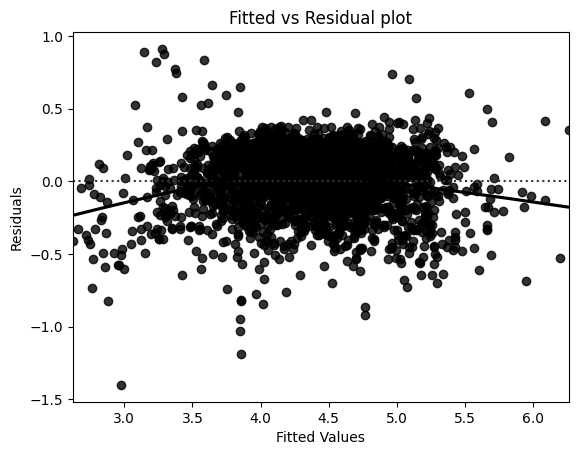

In [69]:

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="black", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY


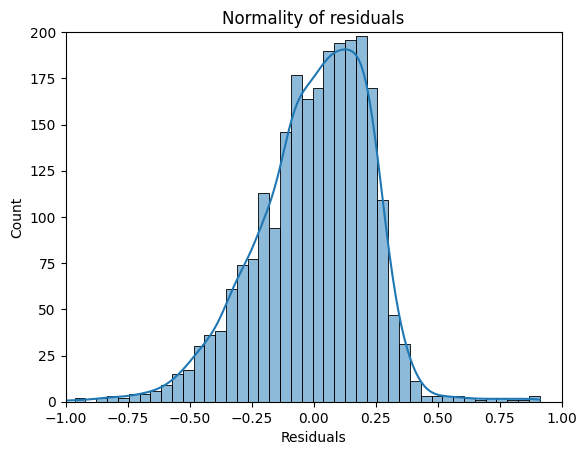

In [70]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.ylim(0,200)
plt.xlim(-1.0,1.0)
plt.show()

- The histogram of residuals does appear to be in a bell-shape, so we can take it for now.
- Let's check the Q-Q plot.

Q-Q Plot

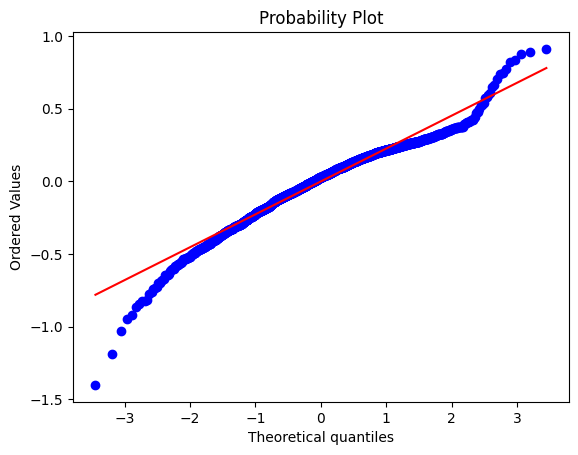

In [71]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

It seems that it was straight for the most part but, except the tails.

Shpairo-Wilk test

In [72]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9688958525657654, pvalue=1.8124699026579888e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [73]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip   #importing lzip from statsmodels

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4) #testing homoscedasticity using goldfeldquandt
lzip(name, test)

[('F statistic', 1.0730385714698663), ('p-value', 0.11174113180040028)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

In [74]:
# predictions on the test set
pred = olsmod2.predict(X_test4)    #using the testing data to make the actual and predicted comparison

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.374601
2341,3.696103,3.968643
1913,3.592093,3.645696
688,4.306495,4.125899
650,4.522115,5.153078
2291,4.259294,4.396644
40,4.997685,5.429407
1884,3.875359,4.043162
2538,4.206631,4.022501
45,5.380450,5.300392


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [75]:
# Let us write the equation of linear regression
Equation = "Price of used devices"
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(olsmod2.params[i], "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            olsmod2.params[i],
            "* (",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod2.params[i], "* (", X_train4.columns[i], ")")

Price of used devices -41.063708119755574 + 0.02306604209057 * ( screen_size ) +  0.021227495987107194 * ( main_camera_mp ) +  0.014023407793083437 * ( selfie_camera_mp ) +  0.021418299955619852 * ( ram ) +  -1.9332051575818703e-05 * ( battery ) +  0.020353234638390418 * ( release_year ) +  0.4201672029125115 * ( normalized_new_price ) +  0.2964153550605059 * ( weight_log ) +  0.11782522040854825 * ( brand_name_Karbonn ) +  0.047639224254930695 * ( brand_name_Lenovo ) +  0.0676228525975874 * ( brand_name_Nokia ) +  0.10151233009505241 * ( brand_name_Realme ) +  0.0945879594874319 * ( brand_name_Xiaomi ) +  0.049483409028714245 * ( 4g_yes )


In [76]:
x_train_final = X_train4.copy() #copying the training data from our x_train 4 variable to use it on our final regression model.
x_test_final = X_test4.copy()

In [77]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     935.0
Date:                   Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                           00:36:33   Log-Likelihood:                 124.37
No. Observations:                   2417   AIC:                            -218.7
Df Residuals:                       2402   BIC:                            -131.9
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229835,0.179369,0.844952,0.843983,4.302568


In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235846,0.182,0.845782,0.843517,4.429796


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.42% of the used phone prices.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- Phones wih higher battery power seems to be most likely bit more heavier. 
- Among the highest selfie camera megapixels, the brand 'Oppo' appears to be have the highest.
- Among the variables screen_size, main_camera_mp, selfie_camera_mp, ram, battery, release_year, normalized_new_price, weight_log, brand_name_Karbonn,brand_name_Lenovo, brand_name_Nokia, brand_name_Realme, brand_name_Xiaomi, 4g_yes seems to influence the used phone price when it up again for re-sold.

- Most of the phones are 4g enabled and 5g phones are mostly latest and high priced too.


## Recommendations 

- One important aspect is the battery. If the phones can be with more battery weighs less then, it might attract the customers more such as : teen-agers and young adults.

- Screen size are another important factor as now 'gaming' and 'streaming' are a big factor. So, bigger screen sizes and improved battery phones may be a positive influence for phone sales overall.

- Targetting an age-group is really important, than we might know more of what the audience wants. 

- More data on customer preferrences might be a good addition.

___